In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
import yfinance as yf

start = '2010-01-01'
end = '2023-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())


[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473148  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370185  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358409  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400682  447610800


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358409,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


In [8]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


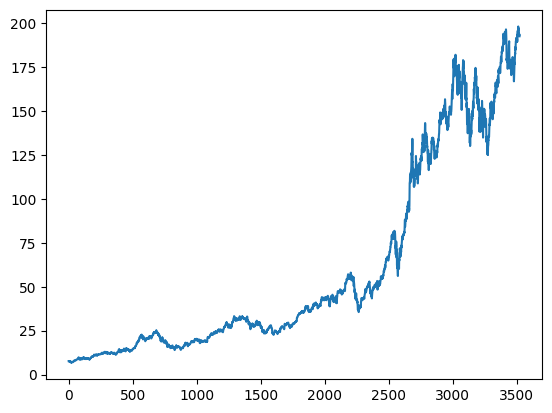

In [9]:
plt.plot(df.Close)

In [10]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3517,195.179993,195.410004,192.970001,193.600006,37122800
3518,193.610001,193.889999,192.830002,193.050003,28919300
3519,192.490005,193.500000,191.089996,193.149994,48087700
3520,194.139999,194.660004,193.169998,193.580002,34049900


In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    181.768301
3518    181.787101
3519    181.898701
3520    182.046001
3521    182.173301
Name: Close, Length: 3522, dtype: float64

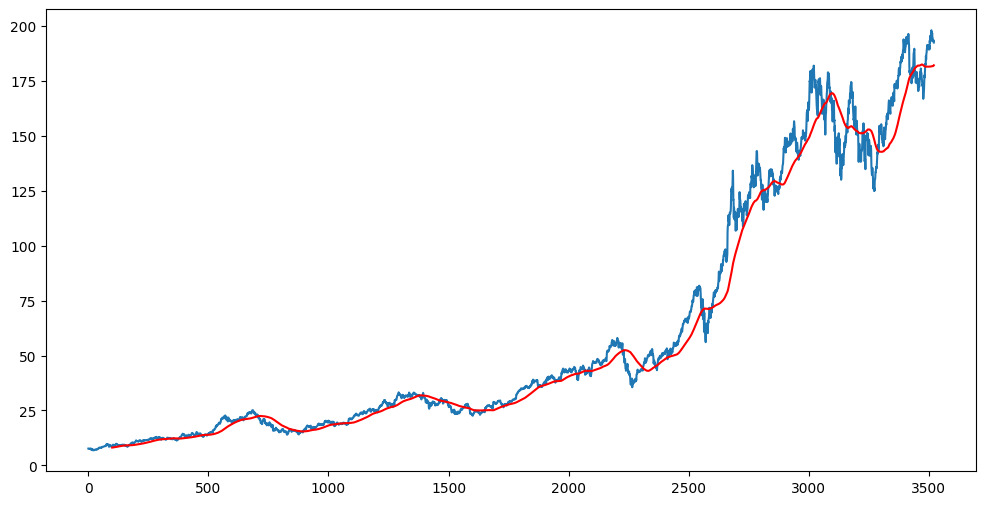

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3517    178.649100
3518    178.871851
3519    179.085250
3520    179.290201
3521    179.487900
Name: Close, Length: 3522, dtype: float64

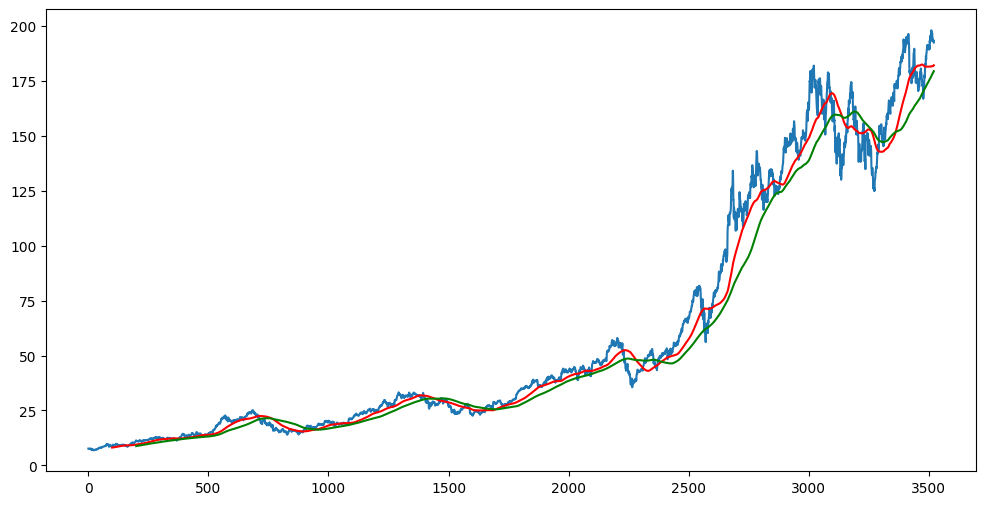

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [15]:
df.shape

(3522, 5)

In [16]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [17]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [19]:
# Scaling down data between 0-1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [21]:
data_training_array.shape

(2465, 1)

In [22]:
# Divide data into Xtrain And Ytrain

import numpy as np

# Assuming data_training_array is already defined and is a 2D array

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])  # Append sequences of 100 time steps
    y_train.append(data_training_array[i, 0])    # Append the target value

x_train, y_train = np.array(x_train), np.array(y_train)

# Verify the shapes
print(x_train.shape)  # Should be (num_samples, 100, num_features)
print(y_train.shape)  # Should be (num_samples,)


(2365, 100, 1)
(2365,)


In [24]:
# Building the LSTM model

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))          
model.add(Dropout(0.2))
 
          
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))          
model.add(Dropout(0.3))
          
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))          
model.add(Dropout(0.4))
          

model.add(LSTM(units = 120, activation = 'relu'))        
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - loss: 0.0399
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 5.3957e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 5.4628e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 4.5084e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 4.6064e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 4.5475e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 4.2457e-04
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 4.2362e-04
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 3.7529e-04
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step - loss: 3.5650e-04
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - loss: 3.5299e-04
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 3.2612e-04
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 3.3138e-04
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 2.9856e-04
Epoch 15

In [27]:
# Saving the model for streamlit 
model.save('keras_model.h5')

In [28]:
data_testing.head()

,Close
2465,59.102501
2466,60.127499
2467,59.990002
2468,60.794998
2469,60.895000


In [29]:
data_training.tail(100)

,Close
2365,44.345001
2366,44.575001
2367,43.767502
2368,43.325001
2369,44.910000
...,...
2460,59.052502
2461,58.967499
2462,58.830002
2463,58.592499


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [32]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [33]:
# Again apply scaling down

input_data = scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [34]:
input_data.shape

(1157, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
                             

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [37]:
# Making Predicton

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


In [38]:
y_predicted.shape

(1057, 1)

In [39]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [40]:
y_predicted

array([[0.10008755],
       [0.10093438],
       [0.1031253 ],
       ...,
       [0.95414096],
       [0.9529774 ],
       [0.95497733]], dtype=float32)

In [41]:
scaler.scale_

array([0.00646057])

In [42]:
scale_factor = 1/0.00646057
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

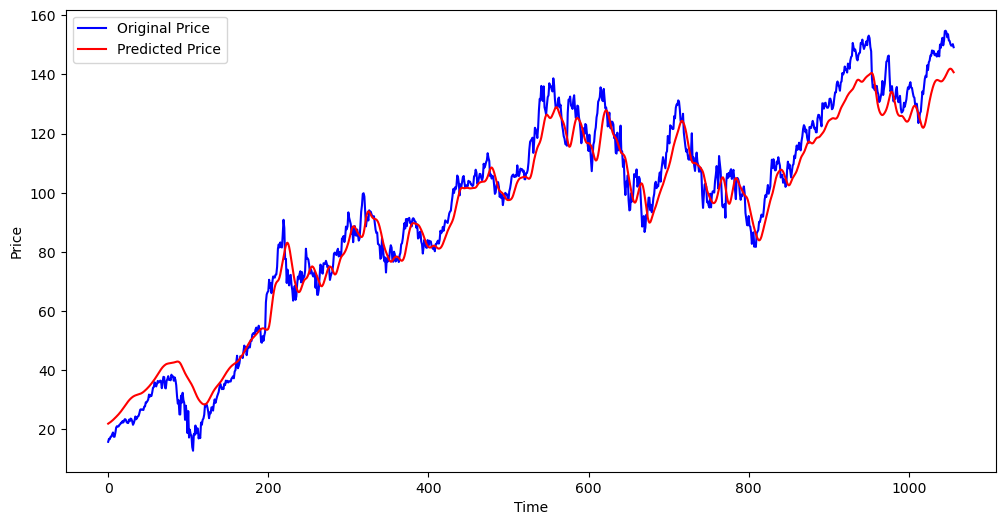

In [48]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()